<a href="https://colab.research.google.com/github/fisterfolks/hack_tinkoff_idea/blob/master/tech_solution_cashback.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np

In [ ]:
DATADIR = "/content/drive/My Drive/hacks" # "./data"
data_story_path = f"{DATADIR}/avk_hackathon_data_story_logs.csv"
data_story_text_path = f"{DATADIR}/avk_hackathon_data_story_texts.csv"

df_datastory = pd.read_csv(data_story_path)
df_dstext = pd.read_csv(data_story_text_path)


In [ ]:
df_datastory.head()

,party_rk,date_time,story_id,category,event
0,64266,2019-12-01 13:05:31,3840,39,like
1,55721,2019-12-01 13:18:08,3857,39,like
2,27563,2019-12-01 13:25:40,3174,78,like
3,61223,2019-12-01 13:25:20,3857,39,like
4,61223,2019-12-01 13:29:05,3765,73,like


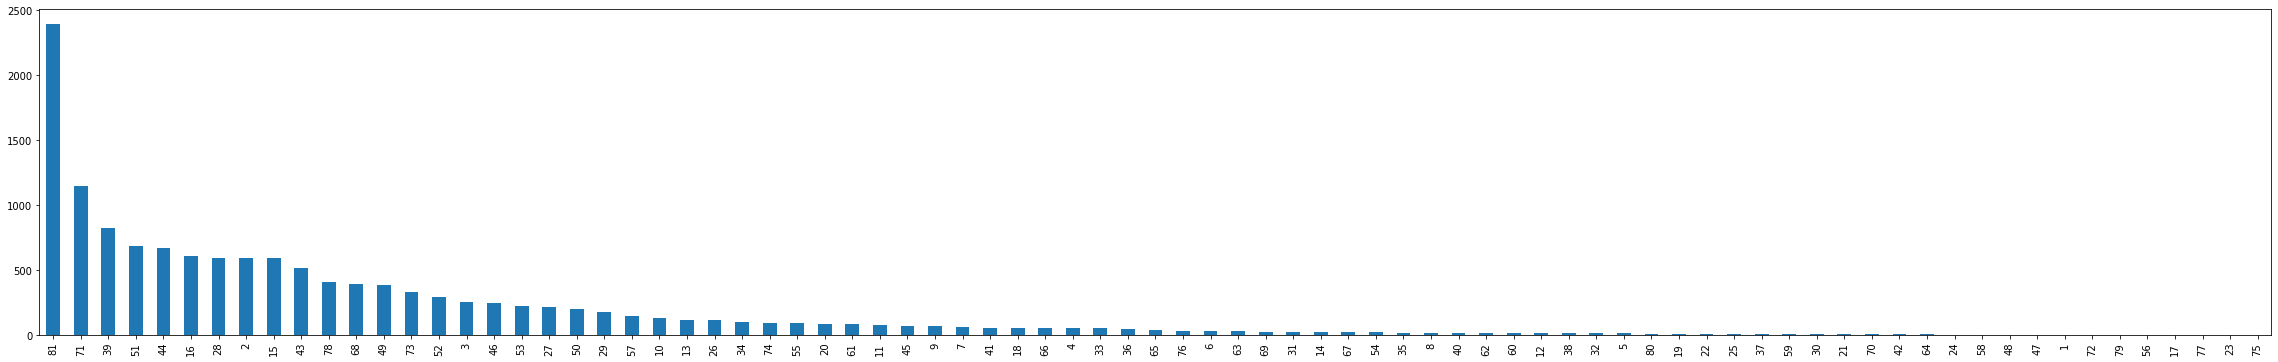

In [ ]:
df_datastory.category.value_counts().plot.bar(figsize=(40,6))

In [ ]:
df = df_datastory[["party_rk","category"]]
df

,party_rk,category
0,64266,39
1,55721,39
2,27563,78
3,61223,39
4,61223,73
...,...,...
13815,19043,71
13816,19043,39
13817,10195,71
13818,10195,39


In [ ]:
df.groupby("category").describe()

party_rk                              ...                            
            count          mean           std  ...      50%       75%      max
category                                       ...                            
1             3.0  60204.000000  13064.859241  ...  52661.0  63975.50  75290.0
2           592.0  42866.415541  23893.032276  ...  43084.5  64273.75  94600.0
3           251.0  47286.318725  25449.906566  ...  52661.0  67672.00  93577.0
4            53.0  37090.056604  23168.228167  ...  34135.0  55183.00  93918.0
5            12.0  51665.500000  23336.883006  ...  59529.0  68793.00  76058.0
...           ...           ...           ...  ...      ...       ...      ...
77            1.0  64034.000000           NaN  ...  64034.0  64034.00  64034.0
78          405.0  41084.135802  26395.454747  ...  38965.0  61223.00  93512.0
79            1.0   8493.000000           NaN  ...   8493.0   8493.00   8493.0
80           11.0  27881.363636  18386.661167  ...  27690.0  31592.00  65693.0
81         2392.0  41531.339047  24854.025658  ...  40173.0  61223.00  94541.0

[81 rows x 8 columns]

In [ ]:
users_categories = {}

for index, row in df.iterrows():
    if row["party_rk"] in users_categories:
      users_categories[row["party_rk"]].append(row["category"])
    else:
      users_categories[row["party_rk"]] = [row["category"]]


def most_frequent(arr):
  return np.argmax(np.bincount(arr))

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


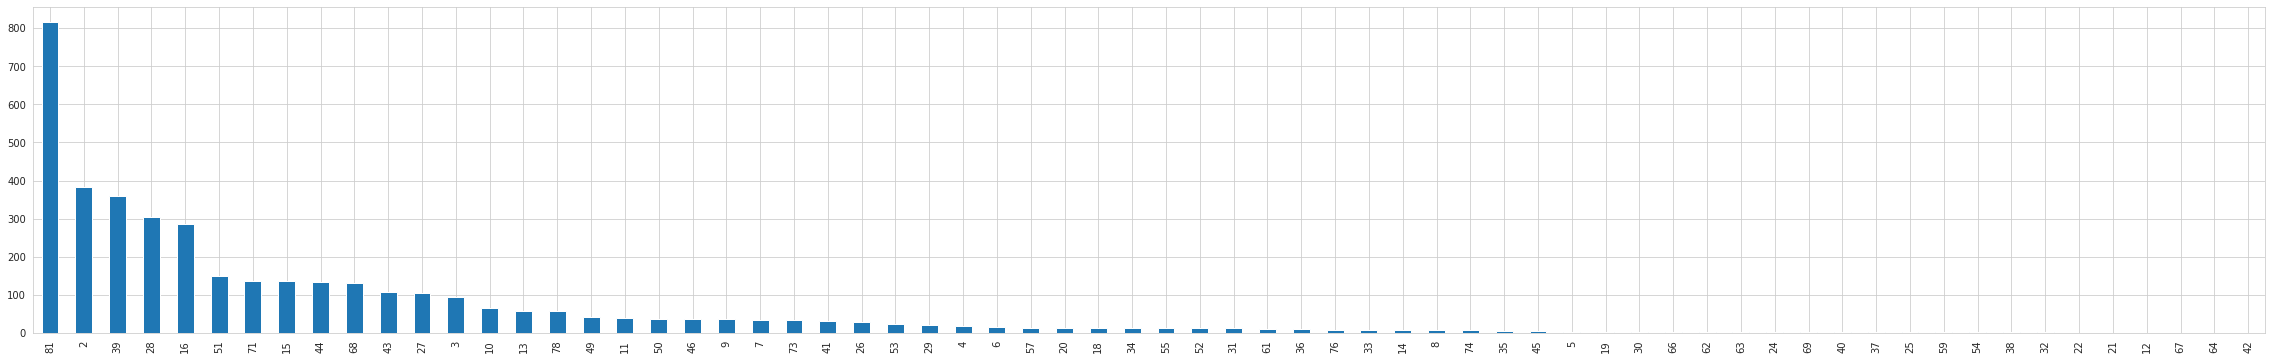

In [ ]:
import seaborn as sns
mf = []
for item in users_categories.items():
  mf.append(most_frequent(item[1]))
sns.set_style("whitegrid")
pd.Series(mf).value_counts().plot.bar(figsize=(40,6))
# most_frequent(users_categories[27563])

In [ ]:
a = np.array([1,2,3,1,2,1,1,1,3,2,2,1])
counts = np.bincount(a)
print(np.argmax(counts))

1
